<a href="https://colab.research.google.com/github/sukh-brar/prework-study-guide/blob/main/15dec3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycontrails

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.0 MB/s eta 0:00:00


In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 70.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from pycontrails import Flight, MetDataset
from pycontrails.datalib.ecmwf import ERA5
from pycontrails.models.cocip import Cocip
from pycontrails.models.humidity_scaling import ConstantHumidityScaling

plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
time_bounds = ("2022-03-01 00:00:00", "2022-03-01 23:00:00")
pressure_levels = (300, 250, 200)

In [5]:
era5pl = ERA5(
    time=time_bounds,
    variables=Cocip.met_variables + Cocip.optional_met_variables,
    pressure_levels=pressure_levels,
)
era5sl = ERA5(time=time_bounds, variables=Cocip.rad_variables)

In [6]:
!pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.3-py3-none-any.whl size=21230 sha256=7595737490d838755c82f9146d06e75f4fd2276d324fc6f8c68db5d9172c1f7b
  Stored in directory: /root/.cache/pip/wheels/be/05/e0/65a6edb0a000498aeaefbadd80228bf5ed1bdbb82840ca1692
Successfully built multiurl


In [7]:
!echo "url: https://cds.climate.copernicus.eu/api/" > ~/.cdsapirc
!echo "key: 36f3ae95-e0a3-48ef-92ff-2eb7e1ff908e" >> ~/.cdsapirc

In [8]:
!pip install netcdf4 # Install netcdf4 library

import xarray as xr

# download data from ERA5 (or open from cache)
met = era5pl.open_metdataset(engine="h5netcdf")  # Use h5netcdf engine which supports netcdf4 files
rad = era5sl.open_metdataset(engine="h5netcdf")  # Use h5netcdf engine which supports netcdf4 files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00


2024-12-15 11:09:00,042 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-15 11:09:00,048 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.le

1f8fd3bd8ec744243a6409e18e500027.nc:   0%|          | 0.00/703M [00:00<?, ?B/s]

2024-12-15 11:15:09,274 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-15 11:15:09,277 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.le

6cd75de7fe5d5cee84a6e9add993a9e2.nc:   0%|          | 0.00/56.2M [00:00<?, ?B/s]

In [9]:
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "10m_u_component_of_wind",
        "10m_v_component_of_wind",
        "2m_dewpoint_temperature",
        "2m_temperature",
        "mean_wave_direction",
        "mean_wave_period",
        "sea_surface_temperature",
        "significant_height_of_combined_wind_waves_and_swell"
    ],
    "year": ["2023"],
    "month": [
        "01"
    ],
    "day": [
        "01", "02"
    ],
    "time": [
        "00:00", "01:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [90, -180, -90, 180]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2024-12-15 11:23:47,366 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-15 11:23:47,371 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.le

e9bce84f7d3be7e827c39a28c44fb4c0.zip:   0%|          | 0.00/34.0M [00:00<?, ?B/s]

'e9bce84f7d3be7e827c39a28c44fb4c0.zip'

In [13]:
met = era5pl.open_metdataset(engine="netcdf4")
rad = era5sl.open_metdataset(engine="netcdf4")

In [14]:
# demo synthetic flight
flight_attrs = {
    "flight_id": "test",
    # set constants along flight path
    "true_airspeed": 226.099920796651,  # true airspeed, m/s
    "thrust": 0.22,  # thrust_setting
    "nvpm_ei_n": 1.897462e15,  # non-volatile emissions index
    "aircraft_type": "E190",
    "wingspan": 48,  # m
    "n_engine": 2,
}

# Example flight
df = pd.DataFrame()
df["longitude"] = np.linspace(-25, -40, 100)
df["latitude"] = np.linspace(34, 40, 100)
df["altitude"] = np.linspace(10900, 10900, 100)
df["engine_efficiency"] = np.linspace(0.34, 0.35, 100)
df["fuel_flow"] = np.linspace(2.1, 2.4, 100)  # kg/s
df["aircraft_mass"] = np.linspace(154445, 154345, 100)  # kg
df["time"] = pd.date_range("2022-03-01T00:15:00", "2022-03-01T02:30:00", periods=100)

flight = Flight(df, attrs=flight_attrs)
flight

Flight [7 keys x 100 length, 7 attributes]
	Keys: longitude, latitude, altitude, engine_efficiency, fuel_flow, ..., time
	Attributes:
	time                [2022-03-01 00:15:00, 2022-03-01 02:30:00]
	longitude           [-40.0, -25.0]
	latitude            [34.0, 40.0]
	altitude            [10900.0, 10900.0]
	flight_id           test
	true_airspeed       226.099920796651
	thrust              0.22
	nvpm_ei_n           1897462000000000.0
	aircraft_type       E190
	wingspan            48
	n_engine            2

In [15]:
!pip install h5netcdf  # Ensure h5netcdf is installed
!pip install netcdf4 # Ensure netcdf4 is installed

import xarray as xr
import h5netcdf

In [16]:
params = {
    "dt_integration": np.timedelta64(10, "m"),
    # The humidity_scaling parameter is only used for ECMWF ERA5 data
    # based on Teoh 2020 and Teoh 2022 - https://acp.copernicus.org/preprints/acp-2022-169/acp-2022-169.pdf
    # Here we use an example of constantly scaling the humidity value by 0.99
    "humidity_scaling": ConstantHumidityScaling(rhi_adj=0.99),
}
cocip = Cocip(met=met, rad=rad, params=params)

output_flight = cocip.eval(source=flight)

In [17]:
df = output_flight.dataframe
df.head()

,waypoint,longitude,latitude,altitude,engine_efficiency,fuel_flow,aircraft_mass,time,flight_id,level,...,n_ice_per_m_1,ef,contrail_age,sdr_mean,rsr_mean,olr_mean,rf_sw_mean,rf_lw_mean,rf_net_mean,cocip
0,0,-25.000000,34.000000,10900.0,0.340000,2.100000,154445.000000,2022-03-01 00:15:00.000000000,test,229.908663,...,1.211856e+13,0.0,0 days,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,-25.151515,34.060606,10900.0,0.340101,2.103030,154443.989899,2022-03-01 00:16:21.818181818,test,229.908663,...,1.298833e+13,0.0,0 days,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,-25.303030,34.121212,10900.0,0.340202,2.106061,154442.979798,2022-03-01 00:17:43.636363636,test,229.908663,...,1.363804e+13,0.0,0 days,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,-25.454545,34.181818,10900.0,0.340303,2.109091,154441.969697,2022-03-01 00:19:05.454545454,test,229.908663,...,1.410517e+13,0.0,0 days,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,-25.606061,34.242424,10900.0,0.340404,2.112121,154440.959596,2022-03-01 00:20:27.272727272,test,229.908663,...,1.437929e+13,0.0,0 days,NaN,NaN,NaN,NaN,NaN,NaN,0.0


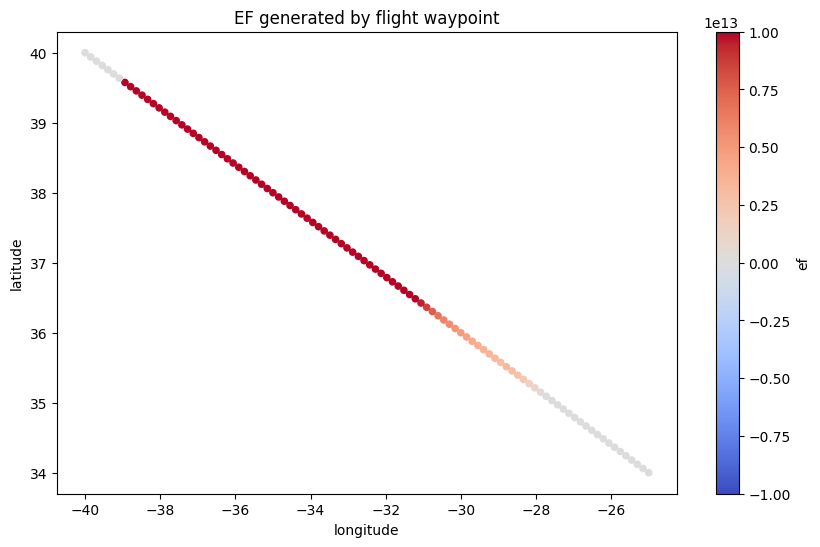

In [18]:
df.plot.scatter(
    x="longitude",
    y="latitude",
    c="ef",
    cmap="coolwarm",
    vmin=-1e13,
    vmax=1e13,
    title="EF generated by flight waypoint",
);

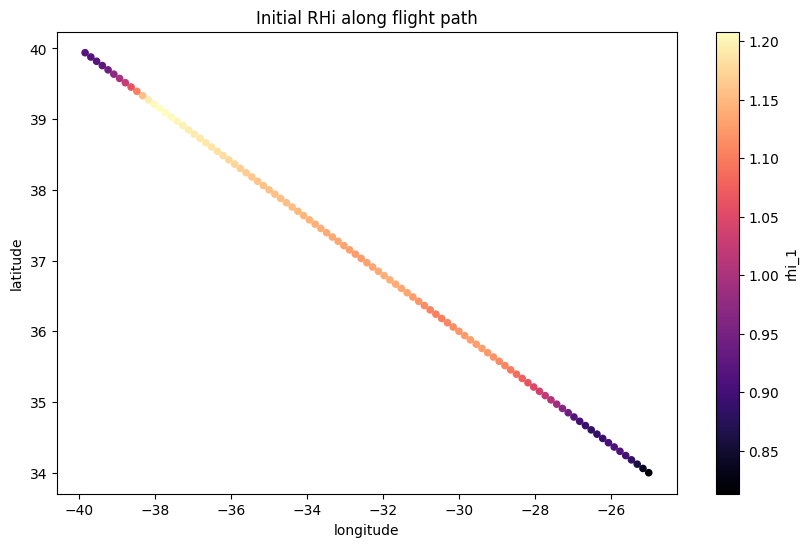

In [19]:
df.plot.scatter(
    x="longitude",
    y="latitude",
    c="rhi_1",
    cmap="magma",
    title="Initial RHi along flight path",
);

In [20]:
contrail = cocip.contrail
contrail.head()

,waypoint,flight_id,formation_time,time,age,longitude,latitude,altitude,level,continuous,...,tau_contrail,dn_dt_agg,dn_dt_turb,rf_sw,rf_lw,rf_net,persistent,ef,timestep,age_hours
0,16,test,2022-03-01 00:36:49.090909090,2022-03-01 00:40:00,0 days 00:03:10.909090910,-27.378050,34.922418,10855.163029,231.533967,True,...,0.058003,7.468790e-20,0.000051,0.0,0.554830,0.554830,True,1.098706e+09,2,0.053030
1,17,test,2022-03-01 00:38:10.909090909,2022-03-01 00:40:00,0 days 00:01:49.090909091,-27.548832,35.003469,10855.510289,231.521343,True,...,0.165483,2.535698e-19,0.000077,0.0,1.974409,1.974409,True,9.423429e+08,2,0.030303
2,18,test,2022-03-01 00:39:32.727272727,2022-03-01 00:40:00,0 days 00:00:00,-27.720407,35.084249,10855.340822,231.527504,False,...,0.408752,4.055273e-19,0.000233,0.0,4.599041,4.599041,True,0.000000e+00,2,0.000000
3,17,test,2022-03-01 00:38:10.909090909,2022-03-01 00:50:00,0 days 00:11:49.090909091,-27.401597,34.855488,10855.696136,231.514588,True,...,0.036820,9.862862e-20,0.000026,0.0,0.561625,0.561625,True,7.055907e+09,3,0.196970
4,18,test,2022-03-01 00:39:32.727272727,2022-03-01 00:50:00,0 days 00:10:27.272727273,-27.569577,34.937642,10857.244315,231.458317,True,...,0.047190,2.492474e-19,0.000030,0.0,0.853852,0.853852,True,8.327085e+09,3,0.174242


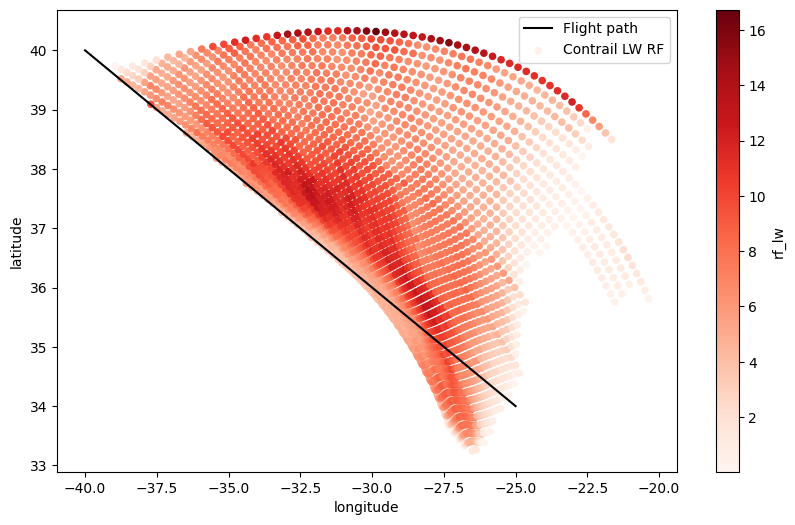

In [21]:
ax = plt.axes()

cocip.source.dataframe.plot(
    "longitude",
    "latitude",
    color="k",
    ax=ax,
    label="Flight path",
)
cocip.contrail.plot.scatter(
    "longitude",
    "latitude",
    c="rf_lw",
    cmap="Reds",
    ax=ax,
    label="Contrail LW RF",
)
ax.legend();

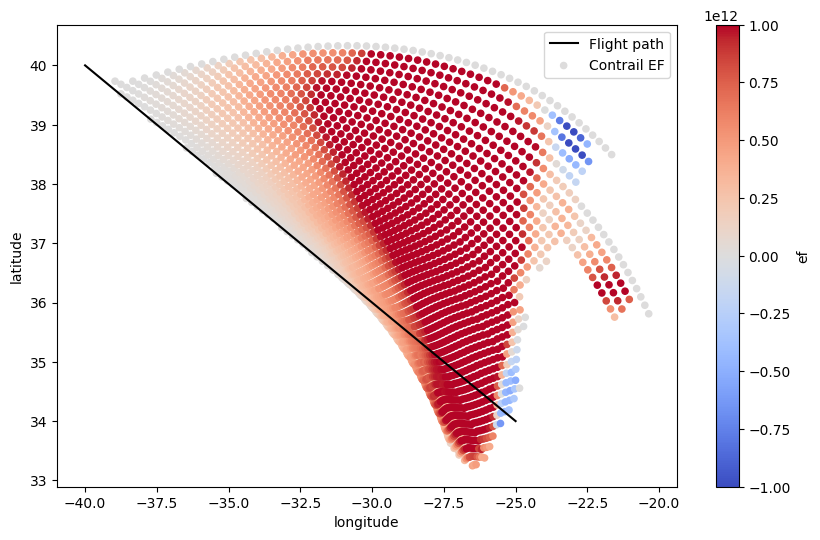

In [22]:
ax = plt.axes()

cocip.source.dataframe.plot(
    "longitude",
    "latitude",
    color="k",
    ax=ax,
    label="Flight path",
)
cocip.contrail.plot.scatter(
    "longitude",
    "latitude",
    c="ef",
    cmap="coolwarm",
    vmin=-1e12,
    vmax=1e12,
    ax=ax,
    label="Contrail EF",
)
ax.legend();

In [23]:
from pycontrails.models.cocip import (
    flight_waypoint_summary_statistics,
    contrail_flight_summary_statistics,
)

In [24]:
# flight_statistics = cocip.output_flight_statistics()
# flight_statistics

waypoint_summary = flight_waypoint_summary_statistics(cocip.source, cocip.contrail)
flight_summary = contrail_flight_summary_statistics(waypoint_summary)
flight_summary

,flight_id,total_flight_distance_flown,total_contrails_formed,total_persistent_contrails_formed,mean_lifetime_contrail_altitude,mean_lifetime_rhi,mean_lifetime_n_ice_per_m,mean_lifetime_r_ice_vol,mean_lifetime_contrail_width,mean_lifetime_contrail_depth,...,mean_lifetime_tau_cirrus,mean_contrail_lifetime,max_contrail_lifetime,mean_lifetime_rf_sw,mean_lifetime_rf_lw,mean_lifetime_rf_net,total_energy_forcing,mean_lifetime_olr,mean_lifetime_sdr,mean_lifetime_rsr
0,test,1.489373e+06,1.489373e+06,1.169463e+06,10924.967554,1.115408,9.352629e+12,0.000006,15384.918904,535.55819,...,0.251823,5.364979,10.583333,-0.157993,5.550708,5.392715,2.340081e+15,192.821991,22.19873,9.819696


In [25]:
flights = []
for i in range(10):
    fl = flight.copy()
    fl.attrs.update(flight_id=f"test-{i:02d}")
    fl.update(latitude=flight["latitude"] + i)
    fl.update(longitude=flight["longitude"] + i)
    flights.append(fl)

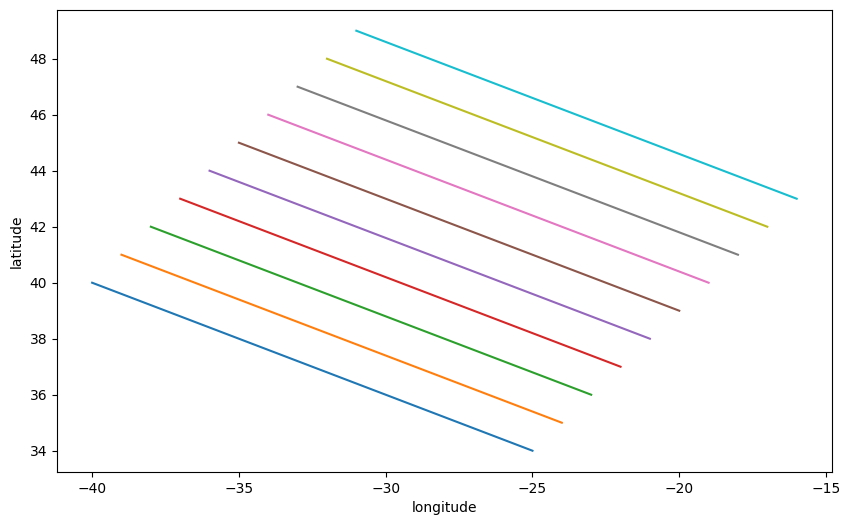

In [26]:
# Visualize the fleet of 10 flights
ax = plt.axes()
for fl in flights:
    fl.plot(ax=ax)

In [27]:
cocip = Cocip(
    met=met,
    rad=rad,
    process_emissions=False,
    humidity_scaling=ConstantHumidityScaling(rhi_adj=0.99),
)

# returns list of Flight outputs
output_flights = cocip.eval(source=flights)

In [28]:
# print EF for each flight
for fl in output_flights:
    print(f"{fl.attrs['flight_id']}: {np.sum(fl['ef'])}")

test-00: 2121833095184567.5
test-01: 1542076794407310.5
test-02: 1319488913923957.5
test-03: 703263542723489.1
test-04: 637173316954.9849
test-05: 4263681056.7842965
test-06: 0.0
test-07: 0.0
test-08: 0.0
test-09: 0.0


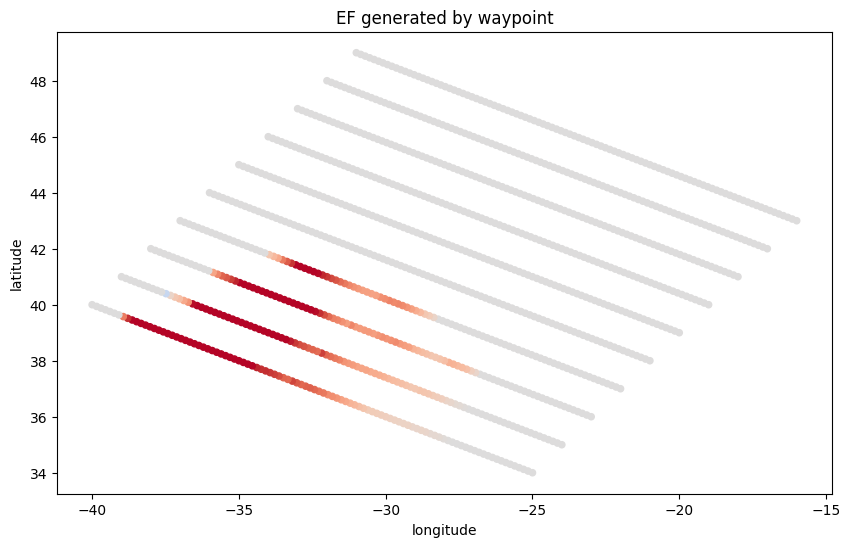

In [29]:
# Visualize the "ef" of each flight
ax = plt.axes()
for fl in output_flights:
    fl.dataframe.plot.scatter(
        x="longitude",
        y="latitude",
        c="ef",
        cmap="coolwarm",
        vmin=-3e13,
        vmax=3e13,
        title="EF generated by waypoint",
        ax=ax,
        colorbar=False,
    )

In [30]:
from pycontrails.models.ps_model import PSFlight

In [31]:
# demo synthetic flight
flight_attrs = {
    "flight_id": "test-ps-model",
    "aircraft_type": "E195",
}

# Example flight
df = pd.DataFrame()
df["longitude"] = np.linspace(-40, -55, 100)
df["latitude"] = np.linspace(38, 45, 100)
df["altitude"] = np.linspace(10900, 10900, 100)
df["time"] = pd.date_range("2022-03-01T00:15:00", "2022-03-01T02:30:00", periods=100)
fl = Flight(data=df, attrs=flight_attrs)

In [32]:
cocip = Cocip(
    met=met,
    rad=rad,
    humidity_scaling=ConstantHumidityScaling(rhi_adj=0.99),
    aircraft_performance=PSFlight(),
)

output_flight = cocip.eval(source=fl)

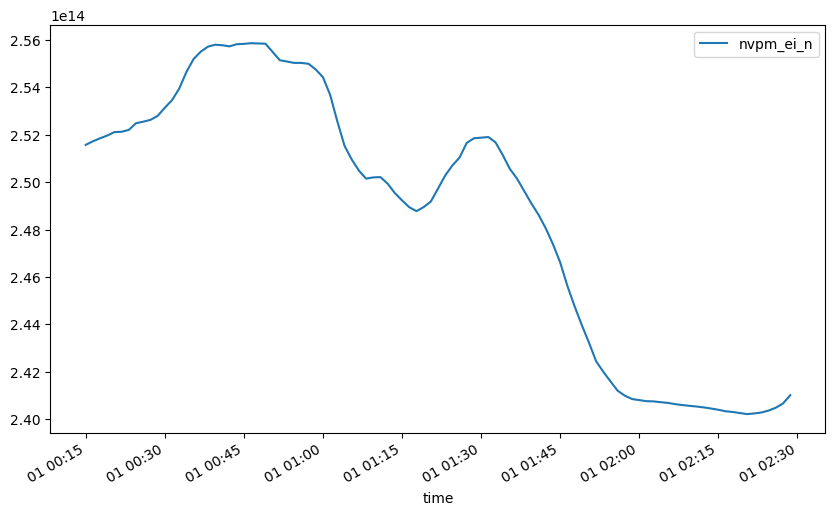

In [33]:
output_flight.dataframe.plot(x="time", y="nvpm_ei_n");

In [34]:
from pycontrails.models.cocip import natural_cirrus_properties_to_hi_res_grid

In [35]:
# demo synthetic flight
flight_attrs = {
    "flight_id": "test",
    "true_airspeed": 226.099920796651,  # true airspeed, m/s
    "thrust": 0.22,  # thrust_setting
    "nvpm_ei_n": 1.897462e15,
    "aircraft_type": "E190",
    "wingspan": 48,
    "n_engine": 2,
}

# Example flight
df = pd.DataFrame()
df["longitude"] = np.linspace(-40, -55, 100)
df["latitude"] = np.linspace(38, 45, 100)
df["altitude"] = np.linspace(10900, 10900, 100)
df["engine_efficiency"] = np.linspace(0.34, 0.35, 100)  # ope
df["fuel_flow"] = np.linspace(2.1, 2.4, 100)  # kg/s
df["aircraft_mass"] = np.linspace(154445, 154345, 100)  # kg
df["time"] = pd.date_range("2022-03-01T00:15:00", "2022-03-01T02:30:00", periods=100)
fl = Flight(data=df, attrs=flight_attrs)

In [36]:
# run model
cocip = Cocip(
    met=met,
    rad=rad,
    process_emissions=False,
    humidity_scaling=ConstantHumidityScaling(rhi_adj=0.99),
)
output_flight = cocip.eval(source=fl)

In [37]:
# get dataframe of contrail waypoints
df_contrails = cocip.contrail
df_contrails["flight_id"] = cocip.source.attrs["flight_id"]

In [38]:
w = df_contrails["longitude"].min()
e = df_contrails["longitude"].max()
s = df_contrails["latitude"].min()
n = df_contrails["latitude"].max()
bbox = (w, s, e, n)

met_bbox = MetDataset(met.data.isel(time=[0])).downselect(bbox)

In [39]:
ds_cirrus = natural_cirrus_properties_to_hi_res_grid(met_bbox)

/usr/local/lib/python3.10/dist-packages/pycontrails/core/met.py:815: UserWarning: Overwriting data in keys `['tau_cirrus']`. Use `.update(...)` to suppress warning.
  warnings.warn(


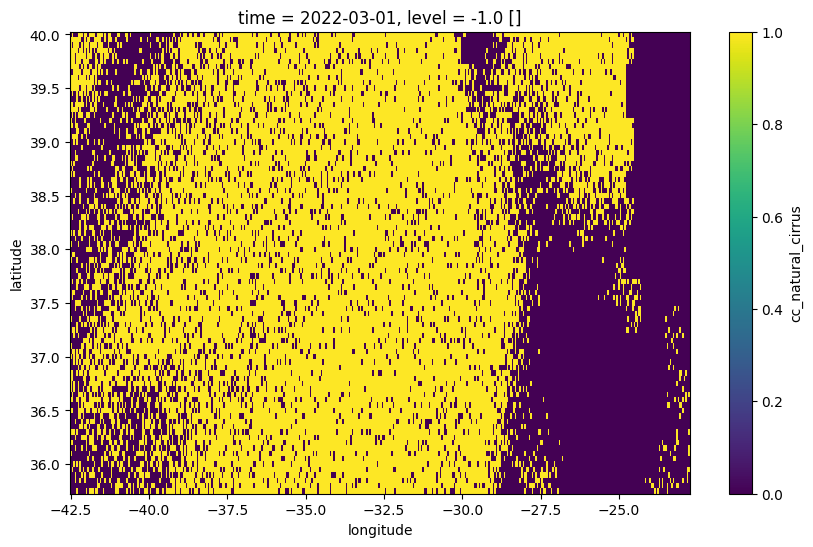

In [40]:
ds_cirrus["cc_natural_cirrus"].data.squeeze().plot(x="longitude", y="latitude");

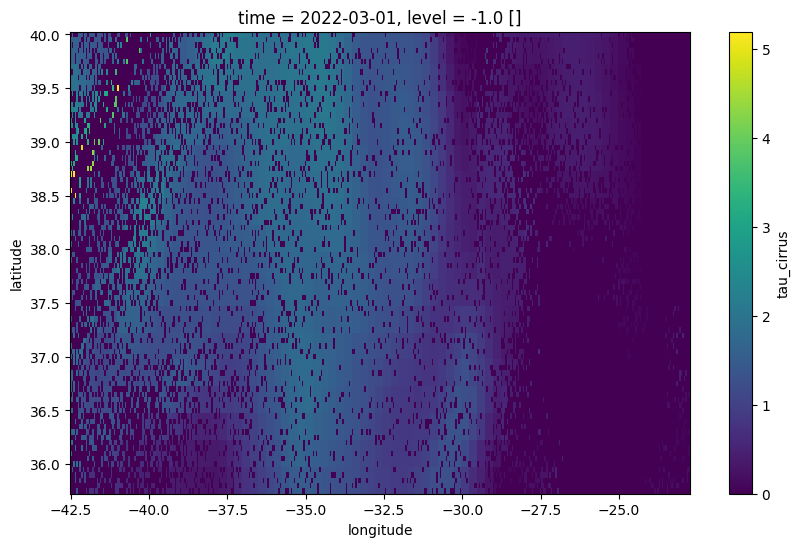

In [41]:
ds_cirrus["tau_cirrus"].data.squeeze().plot(x="longitude", y="latitude");

In [42]:
from pycontrails.models.cocip import compare_cocip_with_goes

In [43]:
# demo synthetic flight
flight_attrs = {
    "flight_id": "test",
    "true_airspeed": 226.099920796651,  # true airspeed, m/s
    "thrust": 0.22,  # thrust_setting
    "nvpm_ei_n": 1.897462e15,
    "aircraft_type": "E190",
    "wingspan": 48,
    "n_engine": 2,
}

# Example flight
df = pd.DataFrame()
df["longitude"] = np.linspace(-40, -55, 100)
df["latitude"] = np.linspace(38, 45, 100)
df["altitude"] = np.linspace(10900, 10900, 100)
df["engine_efficiency"] = np.linspace(0.34, 0.35, 100)  # ope
df["fuel_flow"] = np.linspace(2.1, 2.4, 100)  # kg/s
df["aircraft_mass"] = np.linspace(154445, 154345, 100)  # kg
df["time"] = pd.date_range("2022-03-01T00:15:00", "2022-03-01T02:30:00", periods=100)
fl = Flight(data=df, attrs=flight_attrs)

In [44]:
# run model
cocip = Cocip(
    met=met,
    rad=rad,
    process_emissions=False,
    humidity_scaling=ConstantHumidityScaling(rhi_adj=0.99),
)
output_flight = cocip.eval(source=fl)

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


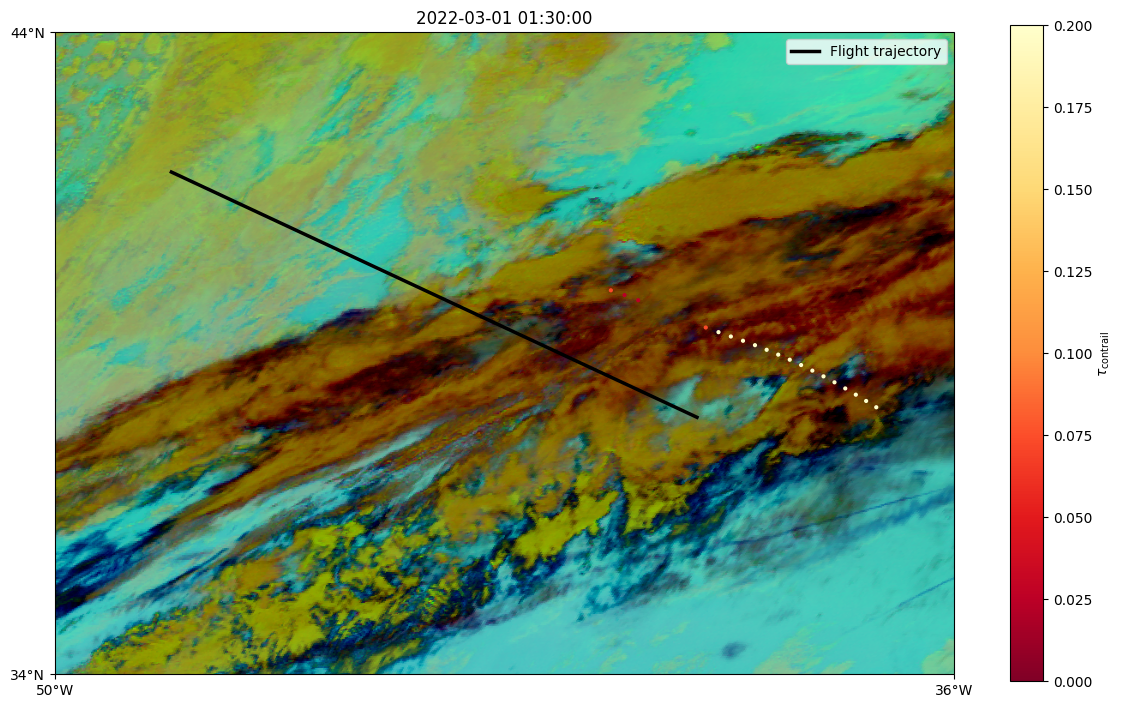

In [45]:
compare_cocip_with_goes(
    time=pd.Timestamp("2022-03-01T01:30:00"),
    flight=output_flight,
    contrail=cocip.contrail,
    spatial_bbox=(-50, 34, -36, 44),
)